# Задача 2 от самого Юманова Василия

### Пункт А

In [125]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import skew, norm, mode, gaussian_kde
from statsmodels.distributions.empirical_distribution import ECDF


np.random.seed(42)                                  # ставим любой сид, но мне сказали 42 круто                                             
sample = np.random.exponential(scale=1, size=25)    # сгенерировал выборку при n = 25

print(f"Мода = {mode(sample).mode}")
print(f"Медиана = {np.median(sample)}")
print(f"Размах = {np.ptp(sample)}")
print(f"Оценка коэффицента ассиметрии = {skew(sample)}")

Мода = 0.020799307999138622
Медиана = 0.4692680899768591
Размах = 3.4827581671591736
Оценка коэффицента ассиметрии = 1.6998221113390404


### Пункт B

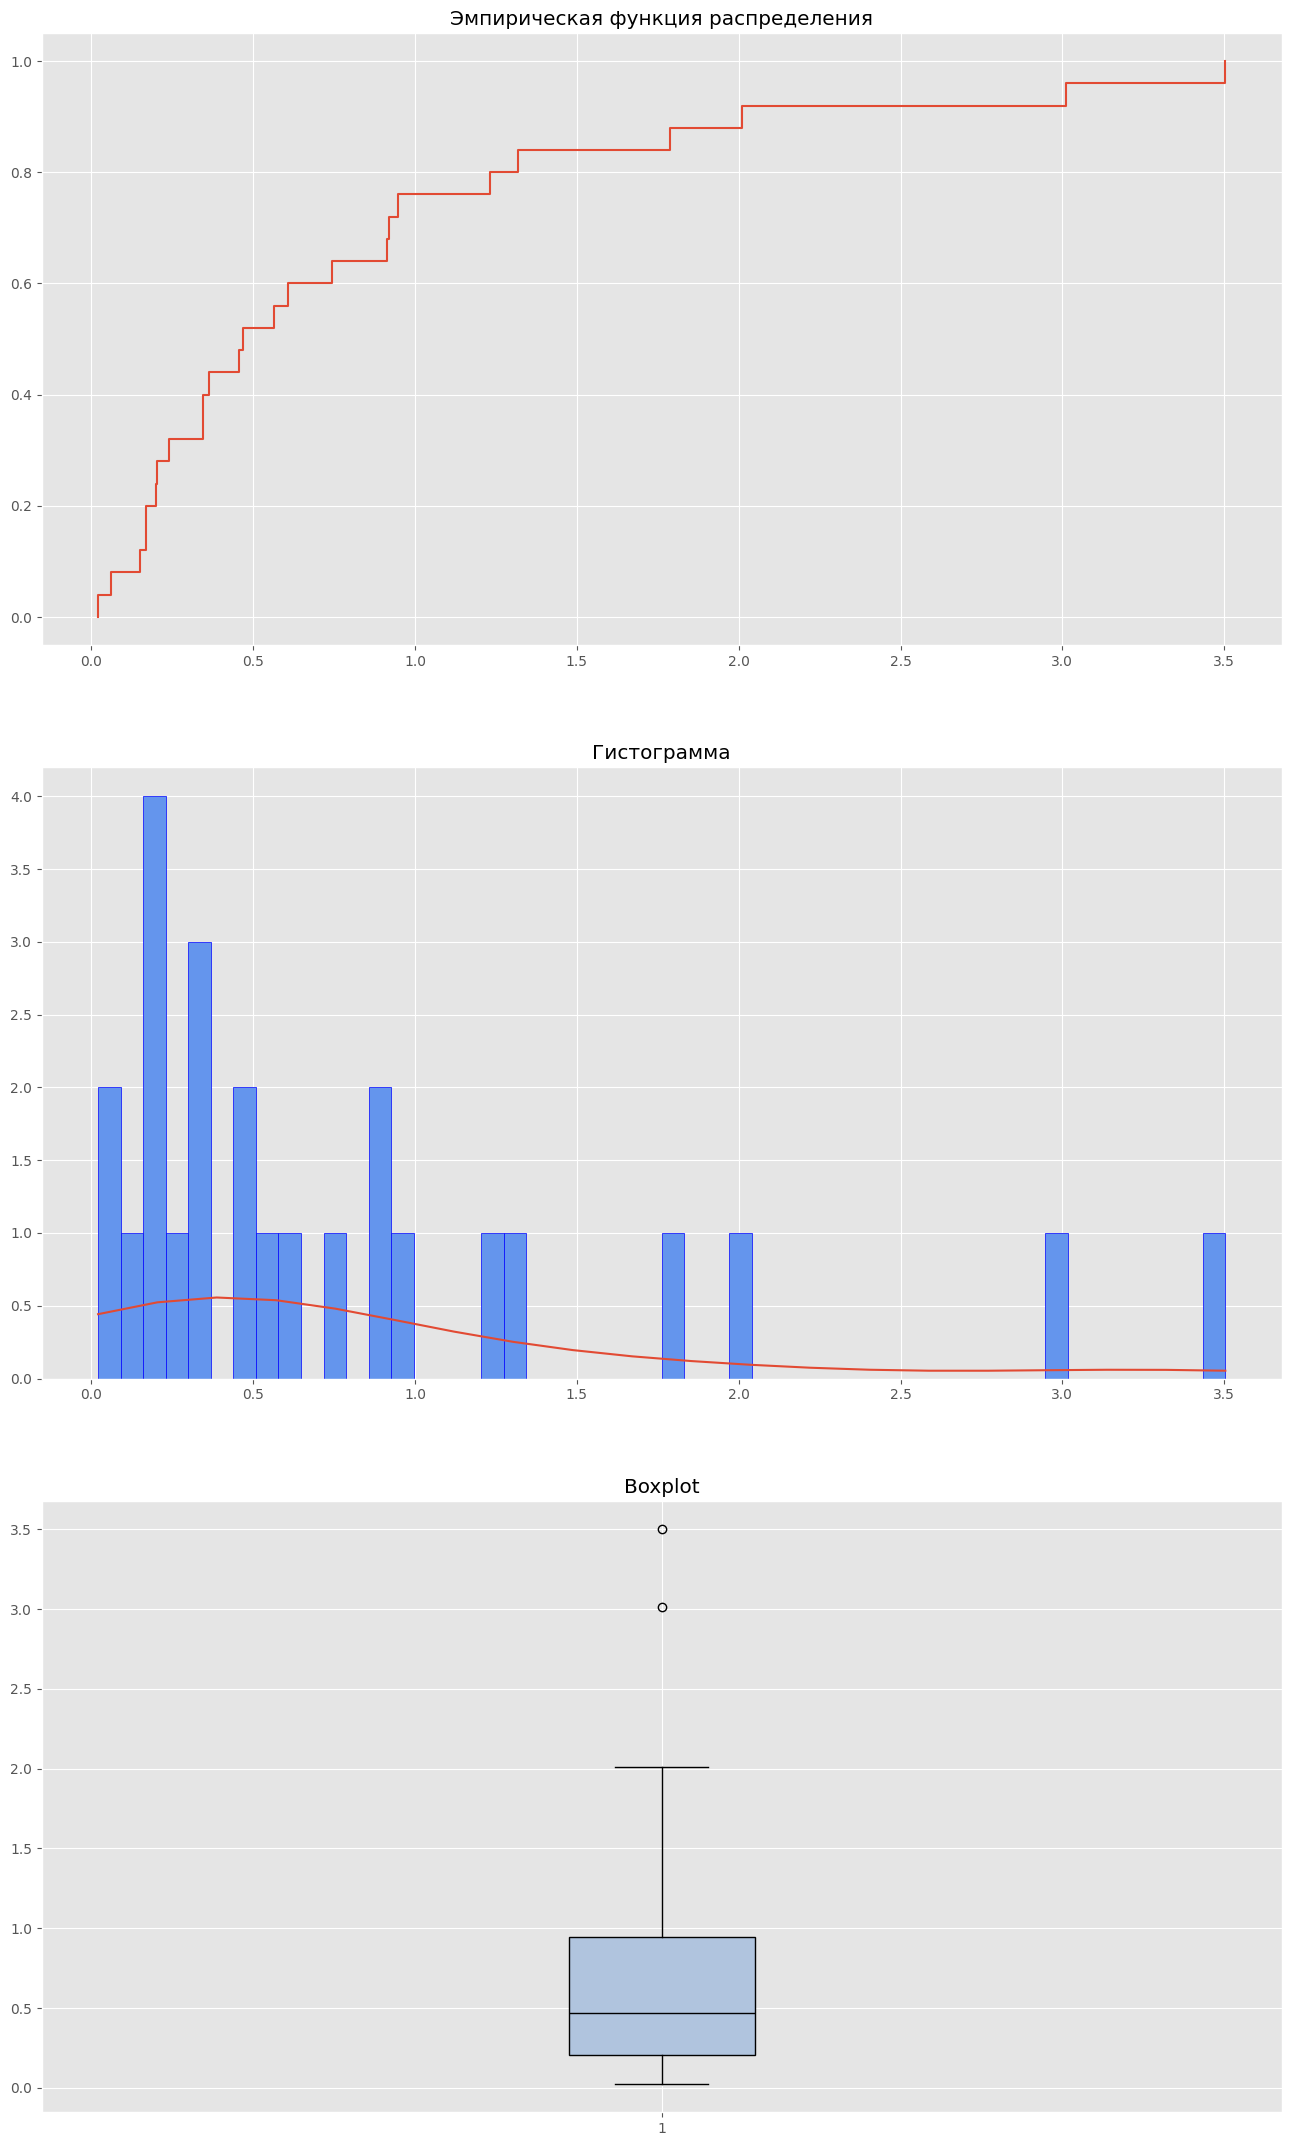

In [126]:
plt.style.use("ggplot")

figure, axis = plt.subplots(3, 1, figsize=(16, 27))

axis[0].set_title("Эмпирическая функция распределения")
axis[1].set_title("Гистограмма")
axis[2].set_title("Boxplot")

# Эмпирическая блаблабла
ecdf = ECDF(sample)
axis[0].step(ecdf.x, ecdf.y, where="post")

# Гистограмма
axis[1].hist(
    sample,
    bins=50,
    color="cornflowerblue",
    edgecolor="blue",
)

# Прикольный график среднего
kde = gaussian_kde(sample)
x = np.linspace(min(sample), max(sample), 20)
axis[1].plot(x, kde(x))


# Boxplot
axis[2].boxplot(
    sample,
    vert=True,
    patch_artist=True,
    boxprops=dict(facecolor="lightsteelblue"),
    medianprops=dict(color="k"),
)

plt.show()

### Пункт C

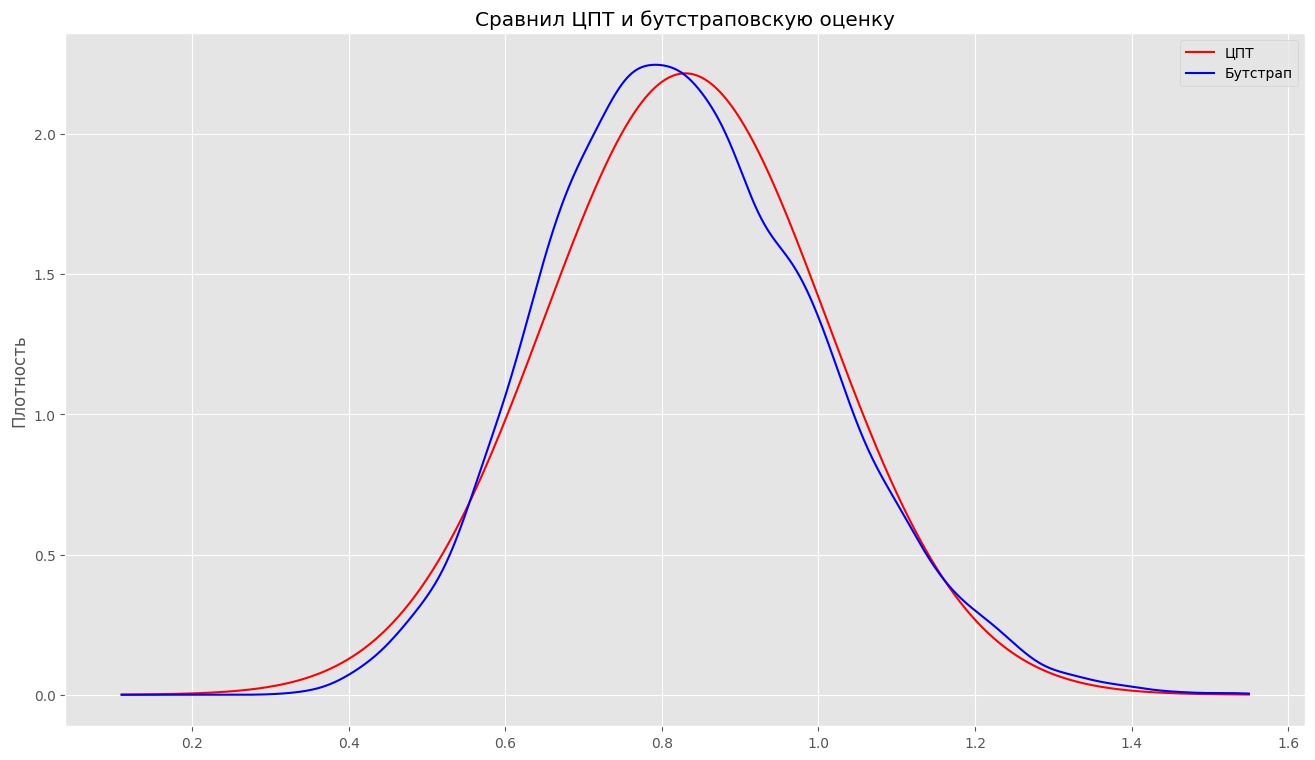

In [127]:
from scipy.stats import gaussian_kde

n = 10000  # 10000 выборок бутстрапа
mu = np.mean(sample)
std_error = np.std(sample, ddof=1) / np.sqrt(sample.size)
x_vals = np.linspace(mu - 4 * std_error, mu + 4 * std_error, 1000)
bootstrap_means = [np.mean(np.random.choice(sample, size=sample.size, replace=True)) for _ in range(n)]

plt.figure(figsize=(16, 9))
plt.plot(x_vals, norm.pdf(x_vals, loc=mu, scale=std_error), 'r-', label='ЦПТ')
plt.plot(x_vals, gaussian_kde(bootstrap_means)(x_vals), 'b-', label='Бутстрап')
plt.title('Сравнил ЦПТ и бутстраповскую оценку') 
plt.ylabel('Плотность')
plt.legend()
plt.show()

### Пункт D

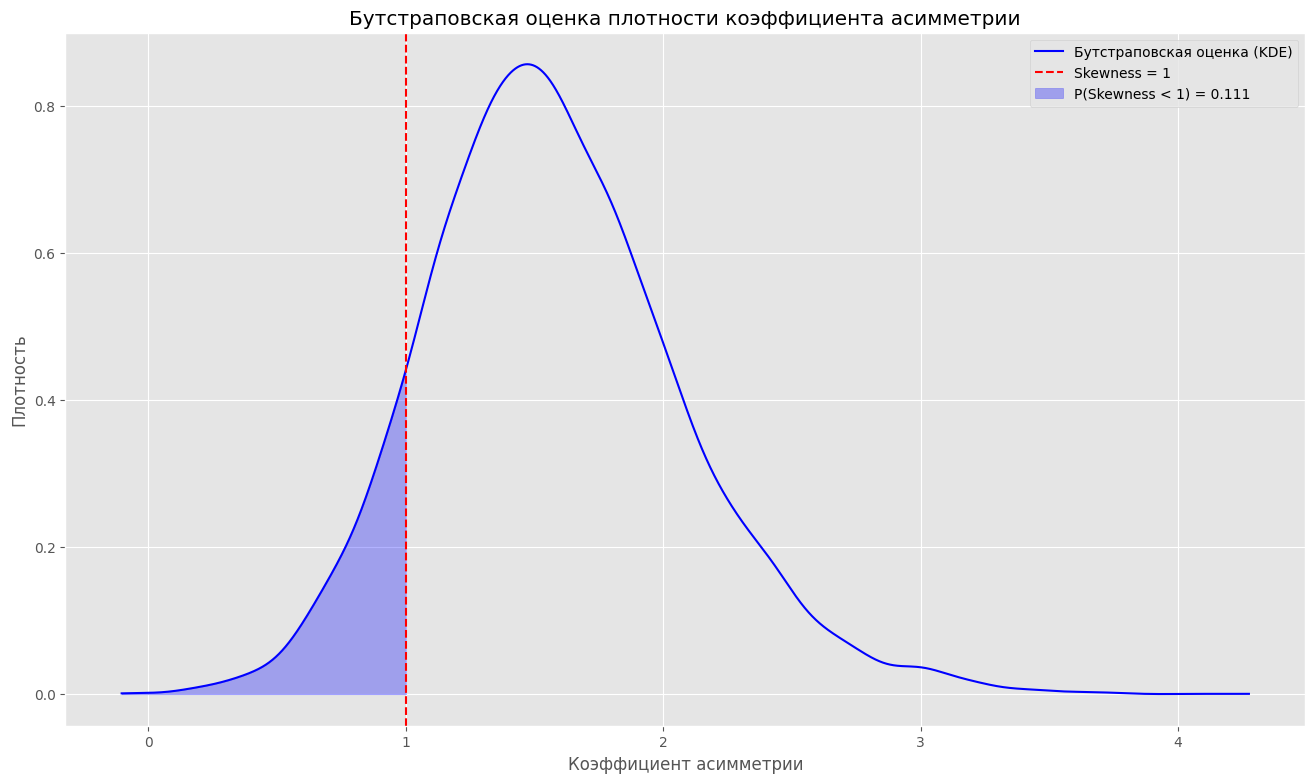

Вероятность того, что коэффициент асимметрии < 1: 0.111


In [128]:
bootstrap_means = [skew(np.random.choice(sample, size=sample.size, replace=True)) for _ in range(n)]
prob_less_than_1 = np.mean(np.array(bootstrap_means) < 1)

x_vals = np.linspace(min(bootstrap_means), max(bootstrap_means), 10000)
plt.figure(figsize=(16, 9))
plt.plot(x_vals, gaussian_kde(bootstrap_means)(x_vals), 'b-', label='Бутстраповская оценка (KDE)')
plt.axvline(1, color='r', linestyle='--', label='Skewness = 1')
plt.fill_between(x_vals, 0, gaussian_kde(bootstrap_means)(x_vals), where=(x_vals < 1), color='blue', alpha=0.3, label=f'P(Skewness < 1) = {prob_less_than_1:.3f}')
plt.title('Бутстраповская оценка плотности коэффициента асимметрии')
plt.xlabel('Коэффициент асимметрии')
plt.ylabel('Плотность')
plt.legend()
plt.show()

print(f"Вероятность того, что коэффициент асимметрии < 1: {prob_less_than_1:.3f}")

### Пункт E

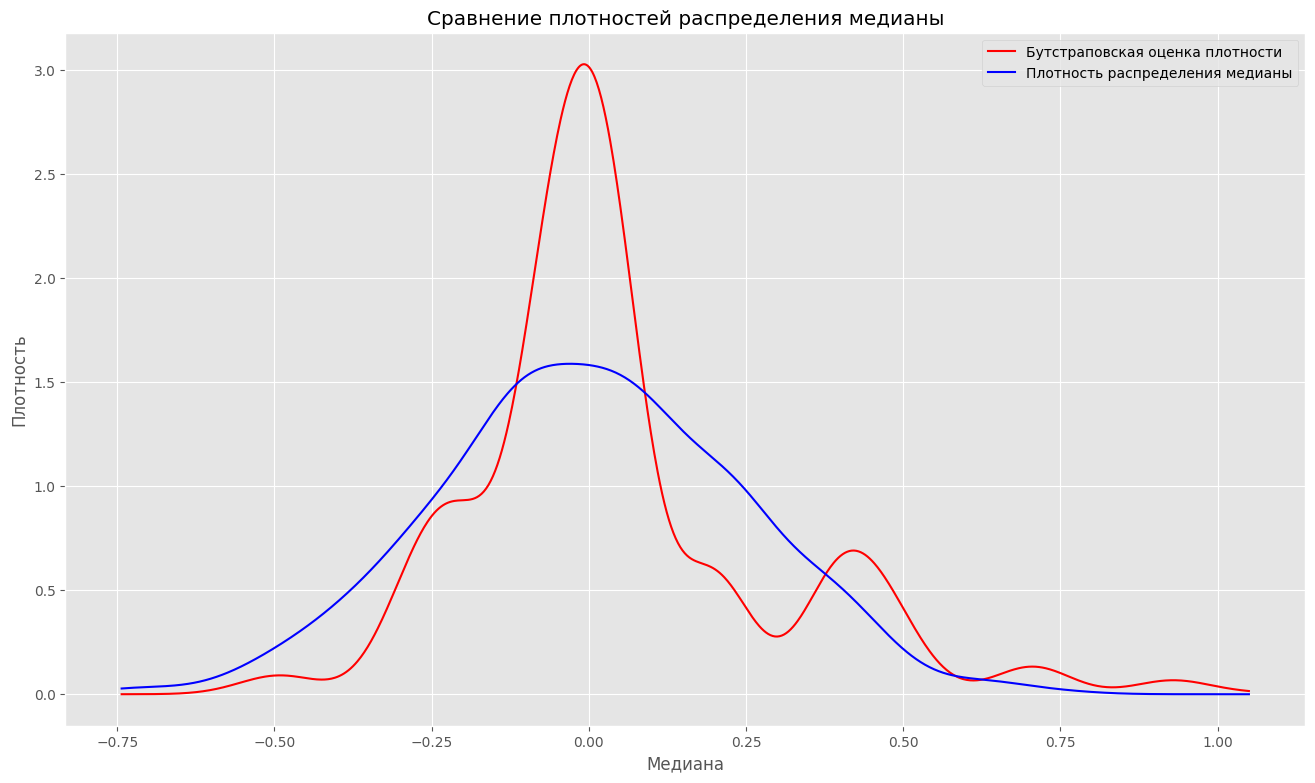

In [134]:
bootstrap_medians = [np.median(np.random.choice(sample, size=len(sample), replace=True)) for _ in range(1000)]
kde_bootstrap = gaussian_kde(bootstrap_medians)

sample_medians = [np.median(np.random.normal(loc=0, scale=1, size=25)) for _ in range(1000)]
kde_sample = gaussian_kde(sample_medians)

x_values = np.linspace(min(bootstrap_medians + sample_medians), max(bootstrap_medians + sample_medians), 1000)
plt.figure(figsize=(16, 9))
plt.plot(x_values, kde_bootstrap(x_values), color='r', label='Бутстраповская оценка плотности')
plt.plot(x_values, kde_sample(x_values), color='b', label='Плотность распределения медианы')
plt.title('Сравнение плотностей распределения медианы')
plt.xlabel('Медиана')
plt.ylabel('Плотность')
plt.legend()
plt.show()